# learn_knn1
> 목표 : 대출 승인을 받을 수 있는 고객과 그렇지 않은 고객을 분류한다.

- 참고 : https://ichi.pro/ko/python-eulo-knn-k-nearest-neighbor-guhyeon-80872795128174
- 데이터 셋 : https://www.kaggle.com/burak3ergun/loan-data-set

### 라이브러리 불러오기
- pandas: Pandas는 Python에서 고성능 데이터 조작을 제공한다.

- matplotlib: Matplotlib는 데이터 시각화에 사용되는 라이브러리이다. 
  - 막대, 파이, 선, 산점도 등

- seaborn: Seaborn은 데이터 셋의 통계 그래픽을 만드는 데 사용되는 라이브러리이다. 

In [31]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [32]:
# Reading the dataset
dataset = pd.read_csv("loan_data_set.csv")

In [33]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 데이터 컬럼 설명
- Loan_Id : Loan_Id는 각 개인을 고유하게 식별하기 위해 모든 지원자에게 제공되는 ID입니다.
- 성별 : 지원자의 성별을 나타냅니다.
- 기혼 : 결혼 여부를 나타냅니다.
- 부양 가족 : 신청자가 돈을 위해 다른 사람에게 의존 함을 나타냅니다.
- 학력 : 지원자의 학력 상태를 나타냅니다.
- 자영업자 : 지원자가 자영업자인지 여부를 나타냅니다.
- 지원자 소득 : 지원자 의 소득을 나타냅니다.
- CoApplicantIncome : 공동 지원자의 소득을 나타냅니다. 공동 신청자는 대출자와 공동 대출을 신청하는 사람입니다.
- Loan_Amount : 신청자가 은행에서 대출 한 금액을 나타냅니다.
- Loan_Amount_Term : 각 지원자의 대출 금액 조건을 나타냅니다. 정기 대출은 고정 이자율 또는 변동 이자율로 고정 금액 및 고정 상환 일정에 대해 은행에서 발행 한 대출 금액입니다.
- Credit_Historty : 신청자 별 대출 금액 기간을 나타냅니다. 신용 기록은 채무자의 책임 상환 기록입니다.
- Loan_Status는 (은 대출 승인 여부를 나타내는 Y 승인을위한 N이 되지 승인 ).

### 결측치 처리


- 결측치 분포 확인

In [34]:
# Checking for missing values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- pandas의 fillna() 함수 사용
  - 범주형 : mode
  - 연속형 : mean

In [35]:
# Filling Gender column by mode
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode().values[0])
# Filling Married column by mode 
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode().values[0])
# Filling Dependents column by mode
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode().values[0])
# Filling Self_Employed column by mode
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode().values[0])
# Filling LoanAmount column by mean
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
# Filling Loan_Amount_Term column by mode
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode().values[0] )
# Filling Credit_History column by mode
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mode().values[0] )

In [36]:
# Checking for missing values
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- 불필요한 컬럼 삭제

In [37]:
# Dropping unnecessary columns
dataset.drop('Loan_ID', axis=1, inplace=True)

- 최종 확인

In [38]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [39]:
# Number of rows and columns of train set
dataset.shape

(614, 12)

In [40]:
# Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### 성별이 대출 승인에 영향을 미치는가?

Male      502
Female    112
Name: Gender, dtype: int64

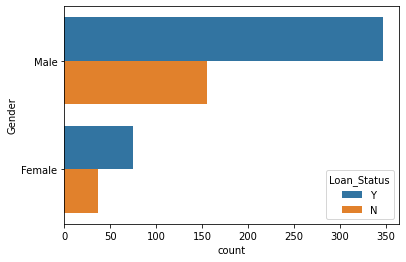

In [41]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = dataset)
dataset['Gender'].value_counts()

### 결혼 여부가 대출 승인에 영향을 미치는가?

Yes    401
No     213
Name: Married, dtype: int64

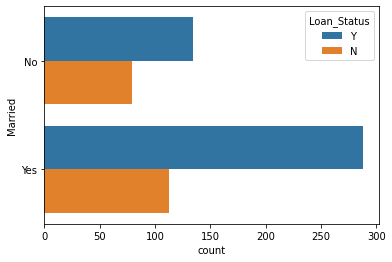

In [42]:
sns.countplot(y= 'Married', hue= 'Loan_Status', data= dataset)
dataset['Married'].value_counts()

### 교육의 정도가 대출 승인에 영향을 미치는가?

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

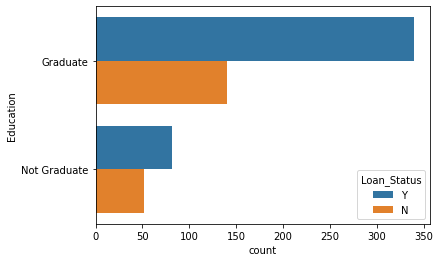

In [43]:
sns.countplot(y = 'Education', hue = 'Loan_Status', data = dataset)
dataset['Education'].value_counts()

### 고용 상태가 대출 승인에 영향을 미치는가?

No     532
Yes     82
Name: Self_Employed, dtype: int64

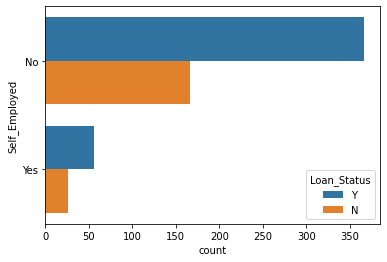

In [44]:
sns.countplot(y= 'Self_Employed', hue= 'Loan_Status', data= dataset)
dataset['Self_Employed'].value_counts()

### 신용 기록이 대출 승인에 영향을 미치는가?

1.0    525
0.0     89
Name: Credit_History, dtype: int64

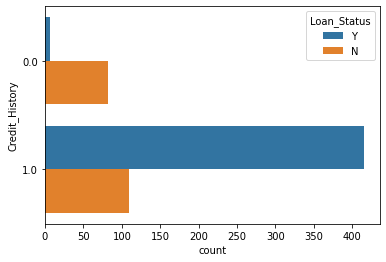

In [45]:
sns.countplot(y= 'Credit_History', hue= 'Loan_Status', data=dataset)
dataset['Credit_History'].value_counts()

### 분석 모델 생성

- 범주 형 데이터를 숫자로 변환해야한다.

In [46]:
# Converting some object data type to int
gender = {"Female": 0, "Male": 1}
yes_no = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}

dataset['Gender'] = dataset['Gender'].replace(gender)
dataset['Married'] = dataset['Married'].replace(yes_no)
dataset['Dependents'] = dataset['Dependents'].replace(dependents)
dataset['Education'] = dataset['Education'].replace(education)
dataset['Self_Employed'] = dataset['Self_Employed'].replace(yes_no)
dataset['Property_Area'] = dataset['Property_Area'].replace(property)
dataset['Loan_Status'] = dataset['Loan_Status'].replace(output)

In [47]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


- 종속 변수와 독립 변수를 분리한다.

In [48]:
# Setting the value for dependent and independent variables
x = dataset.drop('Loan_Status', 1)
y = dataset.Loan_Status

- test와 train 데이터로 분할 한다.
  - train : 75%, test : 25%

In [49]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=38, stratify = y)

- knn 모델 구현

In [50]:
# Fitting the KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- knn 모델을 이용한 예측
  - test 데이터 셋에 대해 대출 승인 여부를 보여준다.

In [51]:
# Prediction of test set
prediction_knn = knn.predict(X_test)

# Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1]


- 예측 된 결과 값과 실제 값을 비교한다. 

In [52]:
# Actual value and the predicted value
a = pd.DataFrame({'Actual value': Y_test, 'Predicted value': prediction_knn})
a.head()

,Actual value,Predicted value
263,1,1
395,1,1
226,0,0
413,1,1
403,1,0


- confusion_matrix(): 실제 값이 알려진 일련의 테스트 데이터에 대한 분류 모델의 성능을 설명하는 데 사용되는 테이블이다.

Text(33.0, 0.5, 'True')

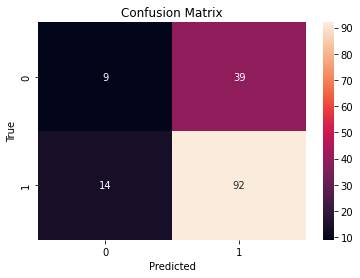

In [53]:
# Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

- classification_report(): 분류 알고리즘에서 예측 품질을 측정하는 데 사용된다.

In [54]:

print(classification_report(Y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.39      0.19      0.25        48
           1       0.70      0.87      0.78       106

    accuracy                           0.66       154
   macro avg       0.55      0.53      0.51       154
weighted avg       0.61      0.66      0.61       154



### 결과 해석
- accuracy : 정확도는 총 데이터 인스턴스 수에서 올바르게 분류 된 데이터 인스턴스의 수를 나타낸다. 
  - 분류 보고서에서 얻은 정확도는 0.66으로 모델의 정확도가 66 %임을 나타낸다. 

- precision : 올바른 긍정 결과 수를 분류 자에 의해 예측 된 긍정적 결과 수로 나눈 값이다.

- recall : 리콜은 모델이 관련 데이터를 얼마나 정확하게 식별 할 수 있는지 측정한다.

- f1-score : f1-Score는 테스트의 정확도를 측정하는 데 사용된다.

### 결론

데이터 세트에는 614 개의 레코드가 있었으며,이 중 75 %는 모델 학습용으로 제공되었고 데이터의 25 % (즉, 154 개 레코드)는 모델 테스트 용으로 제공되었다. 그리고 154 개의 레코드 중 53 개의 레코드가 잘못 분류되었다.